# Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import requests
import json
import plotly.express as px

# Research Question | Reksa
1. Kursus mana yang paling banyak diminati berdasarkan jumlah rater?
2. Kategori atau topik kursus mana yang memiliki kursus dengan rata-rata penilaian tertinggi?
3. Berapa rentang harga kursus di berbagai kategori/topik?
4. Apakah ada pola antara harga kursus dengan jumlah rater atau rating?
5. Apakah ada tren tertentu dalam pembuatan kursus berdasarkan waktu (bulan/tahun)?
6. Bagaimana hubungan waktu pembuatan kursus dengan popularitas (rating dan rater)?
7. Topik apa yang paling sering muncul dalam kursus populer?
8. Bagaimana distribusi popularitas kursus berdasarkan topik tertentu?

# Data Wrangling | Fitri

In [ ]:
def build_data(data):
  data = {
      "name": data['name'],
      "description": data['description'],
      "createdDate": data['createdDate'],
      "marketType": data['marketType'],
      "price": data['price']['price'],
      "rating": data['rating']['averageFloat'],
      "rater": data['rating']['total'],
      "topics": list(map(lambda x: x['name'], data['topics']))
  }

  return data

In [ ]:
# Replace 'your_api_url' with the actual API endpoint
final_data = []

for i in range(1, 6):
  url = f'https://gw.ruangguru.com/v2/skillacademy/product/courses/by-topic?page={i}&pageSize=100&serials=&slugs=kelas-pro-course-terbaik&visibility=PUBLIC&preset=topic'

  try:
      response = requests.get(url)
      response.raise_for_status()  # Check if the request was successful
      data = response.json()  # Parse the JSON response
      courses = data['data']['courses']
      for course in courses:
          data = build_data(course)
          final_data.append(data)
  except requests.exceptions.HTTPError as http_err:
      print(f"HTTP error occurred: {http_err}")
  except Exception as err:
      print(f"Other error occurred: {err}")


In [ ]:
final_df = pd.DataFrame(final_data)
final_df

,name,description,createdDate,marketType,price,rating,rater,topics
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03T07:45:38Z,ONLINE,360000,4.9,47973,"[E-Commerce Marketing Complete Guide, Social M..."
1,Mulai Karier sebagai UX Designer,<div><em>&nbsp;UX Design</em> merupakan hal ya...,2020-01-23T04:07:49Z,ONLINE,166667,4.8,1440,"[Kelas Pro Course Terbaik, Pilihan Skill Academy]"
2,Kunci Sukses Memulai Travel Agency,<div>Pariwisata menjadi usaha yang selalu berk...,2020-07-28T05:18:05Z,ONLINE,240000,4.9,1145,"[Kelas Pro Course Terbaik, Pilihan Memasak, Pi..."
3,Sekretaris 101: Pengelolaan Surat dan Dokumen ...,<div>Sekretaris memiliki peran yang penting da...,2023-07-04T10:41:24Z,ONLINE,360000,5.0,7,"[Kelas Pro Course Terbaik, Pilihan Desember, P..."
4,E-Commerce 101: Kunci Sukses Berjualan Online,<div>Penjualan produk melalui platform <em>e-c...,2020-04-27T03:18:03Z,ONLINE,100000,5.0,57003,"[E-Commerce Marketing Complete Guide, Kelas Pr..."
...,...,...,...,...,...,...,...,...
474,Belajar Menerapkan Prinsip Dasar Memasak dan S...,<div>Industri makanan dan minuman di indonesia...,2022-10-17T02:45:04Z,ONLINE,550000,5.0,549,"[Kelas Pro Course Terbaik, Siap Kerja]"
475,Memulai Bisnis Pastry untuk Pemilik Usaha Kue ...,<div>Makanan merupakan kebutuhan dasar setiap ...,2022-10-17T04:00:12Z,ONLINE,550000,4.4,548,"[Kelas Pro Course Terbaik, Siap Kerja, Skillsa..."
476,Mengolah Data dan Dokumen untuk Menjadi Tenaga...,<div>Tenaga perkantoran umum memiliki tugas ya...,2022-10-17T02:36:56Z,ONLINE,500000,5.0,509,"[Kelas Pro Course Terbaik, Siap Kerja]"
477,Belajar Memanfaatkan Kecerdasan Buatan (AI) da...,<div>Dengan semakin beragamnya produk dan terd...,2022-10-17T02:39:49Z,ONLINE,675000,4.7,509,"[SKILLDISKON, Kelas Pro Course Terbaik, Siap K..."


In [ ]:
final_df.to_csv('final_data.csv', index=False)

In [ ]:
# Skill Academy Course Dataset
df = pd.read_csv("/content/final_data.csv")
df

,name,description,createdDate,marketType,price,rating,rater,topics
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03T07:45:38Z,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia..."
1,Mulai Karier sebagai UX Designer,<div><em>&nbsp;UX Design</em> merupakan hal ya...,2020-01-23T04:07:49Z,ONLINE,166667,4.8,1440,"['Kelas Pro Course Terbaik', 'Pilihan Skill Ac..."
2,Kunci Sukses Memulai Travel Agency,<div>Pariwisata menjadi usaha yang selalu berk...,2020-07-28T05:18:05Z,ONLINE,240000,4.9,1145,"['Kelas Pro Course Terbaik', 'Pilihan Memasak'..."
3,Sekretaris 101: Pengelolaan Surat dan Dokumen ...,<div>Sekretaris memiliki peran yang penting da...,2023-07-04T10:41:24Z,ONLINE,360000,5.0,7,"['Kelas Pro Course Terbaik', 'Pilihan Desember..."
4,E-Commerce 101: Kunci Sukses Berjualan Online,<div>Penjualan produk melalui platform <em>e-c...,2020-04-27T03:18:03Z,ONLINE,100000,5.0,57003,"['E-Commerce Marketing Complete Guide', 'Kelas..."
...,...,...,...,...,...,...,...,...
474,Belajar Menerapkan Prinsip Dasar Memasak dan S...,<div>Industri makanan dan minuman di indonesia...,2022-10-17T02:45:04Z,ONLINE,550000,5.0,549,"['Kelas Pro Course Terbaik', 'Siap Kerja']"
475,Memulai Bisnis Pastry untuk Pemilik Usaha Kue ...,<div>Makanan merupakan kebutuhan dasar setiap ...,2022-10-17T04:00:12Z,ONLINE,550000,4.4,548,"['Kelas Pro Course Terbaik', 'Siap Kerja', 'Sk..."
476,Mengolah Data dan Dokumen untuk Menjadi Tenaga...,<div>Tenaga perkantoran umum memiliki tugas ya...,2022-10-17T02:36:56Z,ONLINE,500000,5.0,509,"['Kelas Pro Course Terbaik', 'Siap Kerja']"
477,Belajar Memanfaatkan Kecerdasan Buatan (AI) da...,<div>Dengan semakin beragamnya produk dan terd...,2022-10-17T02:39:49Z,ONLINE,675000,4.7,509,"['SKILLDISKON', 'Kelas Pro Course Terbaik', 'S..."


In [ ]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         479 non-null    object 
 1   description  479 non-null    object 
 2   createdDate  479 non-null    object 
 3   marketType   479 non-null    object 
 4   price        479 non-null    int64  
 5   rating       479 non-null    float64
 6   rater        479 non-null    int64  
 7   topics       479 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.1+ KB


In [ ]:
# Mengecek apakah ada duplikat data
a = df.duplicated().sum()
print(a)
if a == 0 :
  print('Tidak ada data duplikat')
else :
  print('Terdapat data duplikat')

0
Tidak ada data duplikat


In [ ]:
# Cek missing value
df.isna().sum()

,0
name,0
description,0
createdDate,0
marketType,0
price,0
rating,0
rater,0
topics,0


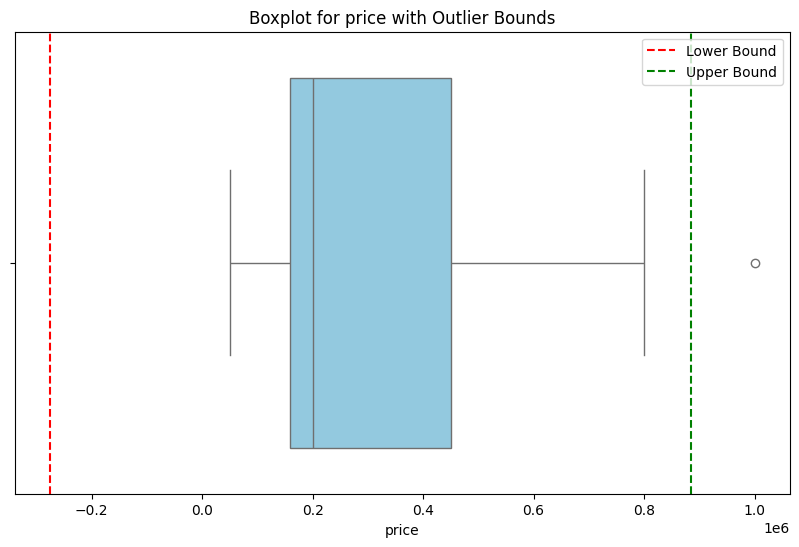

Number of outliers in price: 1


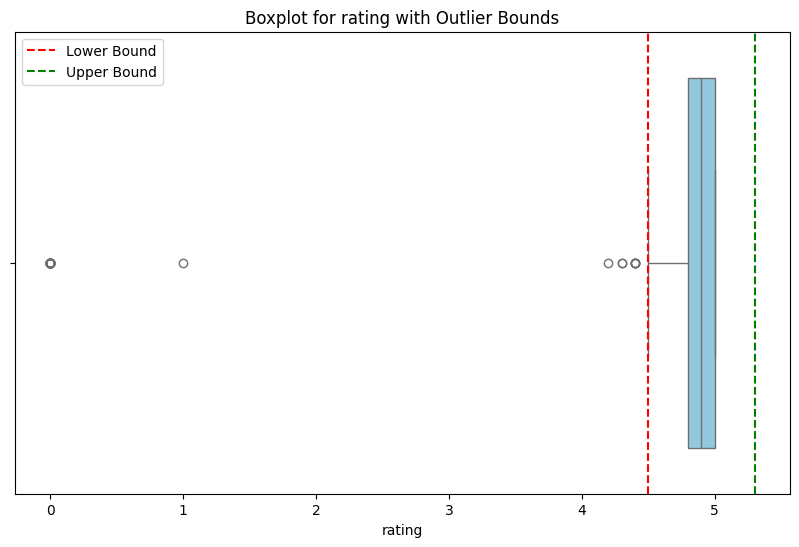

Number of outliers in rating: 57


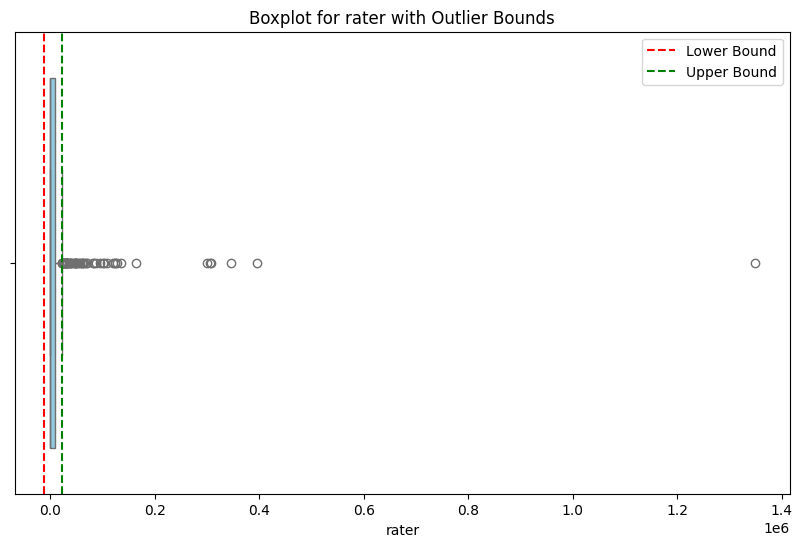

Number of outliers in rater: 57
Total outlier indices: 115


In [ ]:
# Pilih variabel yang ingin diperiksa untuk outlier
selected_columns = ['price', 'rating', 'rater']

# Cek outlier
outliers_index = []

for column in selected_columns:
    if column in df.columns:  # Pastikan kolom ada di dataset
        # Menghitung IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas atas dan bawah
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Visualisasi dengan boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column, color='skyblue')
        plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
        plt.title(f'Boxplot for {column} with Outlier Bounds')
        plt.legend()
        plt.show()

        # Mengidentifikasi outlier
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        for idx in outliers.index:
            if idx not in outliers_index:
                outliers_index.append(idx)

        # Menampilkan jumlah outlier
        print(f"Number of outliers in {column}: {len(outliers)}")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam dataset.")

# Menampilkan indeks outlier
print(f"Total outlier indices: {len(outliers_index)}")


In [ ]:
# Statistik deskriptif data
df.describe()

,price,rating,rater
count,479.000000,479.000000,4.790000e+02
mean,297607.864301,4.400000,1.541907e+04
std,190204.261904,1.485678,7.253966e+04
min,50000.000000,0.000000,0.000000e+00
25%,160000.000000,4.800000,5.090000e+02
50%,200000.000000,4.900000,6.300000e+02
75%,450000.000000,5.000000,9.182000e+03
max,1000000.000000,5.000000,1.347890e+06


# EDA (Exploratory Data Analysis) | Oxa

Dapat dilihat pada Box-Plot di atas bahwa terdapat outliers pada kolom kelima (price), keenam (rating), dan ketujuh (rater). Hal ini sesuai dengan perhitungan secara manual dengan *lower bound* dan *upper bound* bahwa **terdapat outlier pada kolom price, rating, dan rater**.

In [ ]:
print("Statistik Deskriptif:\n", df.describe())

Statistik Deskriptif:
                 price      rating         rater
count      479.000000  479.000000  4.790000e+02
mean    297607.864301    4.400000  1.541907e+04
std     190204.261904    1.485678  7.253966e+04
min      50000.000000    0.000000  0.000000e+00
25%     160000.000000    4.800000  5.090000e+02
50%     200000.000000    4.900000  6.300000e+02
75%     450000.000000    5.000000  9.182000e+03
max    1000000.000000    5.000000  1.347890e+06


In [ ]:
df_outlier = df[['price','rating','rater']]

# Korelasi untuk kolom numerik
correlation_matrix = df_outlier.corr()
print("\n---- Korelasi Antar Variabel Numerik ----")
print(correlation_matrix)


---- Korelasi Antar Variabel Numerik ----
           price    rating     rater
price   1.000000  0.223663 -0.078381
rating  0.223663  1.000000  0.082174
rater  -0.078381  0.082174  1.000000


In [ ]:
# a. Memeriksa distribusi data numerik
numerical_columns = df.select_dtypes(include=np.number).columns
print("\n---- Distribusi Data Numerik ----")
for col in numerical_columns:
    print(f"{col}: Mean = {df[col].mean():.2f}, Median = {df[col].median():.2f}, Std Dev = {df[col].std():.2f}")


---- Distribusi Data Numerik ----
price: Mean = 297607.86, Median = 200000.00, Std Dev = 190204.26
rating: Mean = 4.40, Median = 4.90, Std Dev = 1.49
rater: Mean = 15419.07, Median = 630.00, Std Dev = 72539.66


In [ ]:
# Menghitung skewness untuk setiap kolom numerik
skewness_values = df_outlier.apply(skew)

# Menampilkan hasil skewness
print("Skewness pada kolom numerik:")
print(skewness_values)

Skewness pada kolom numerik:
price      0.952564
rating    -2.596653
rater     13.956887
dtype: float64


# Visualisasi Data | Irfan

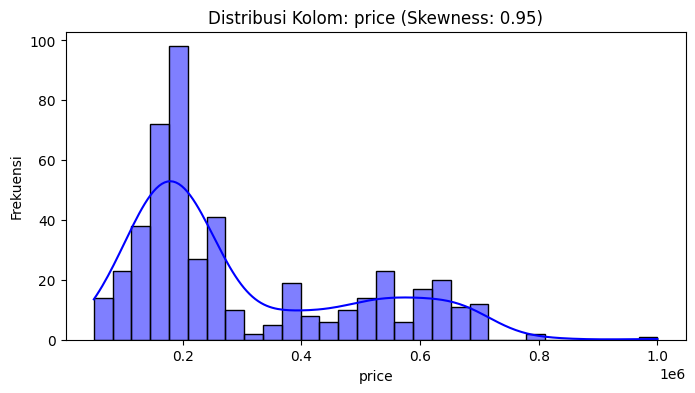

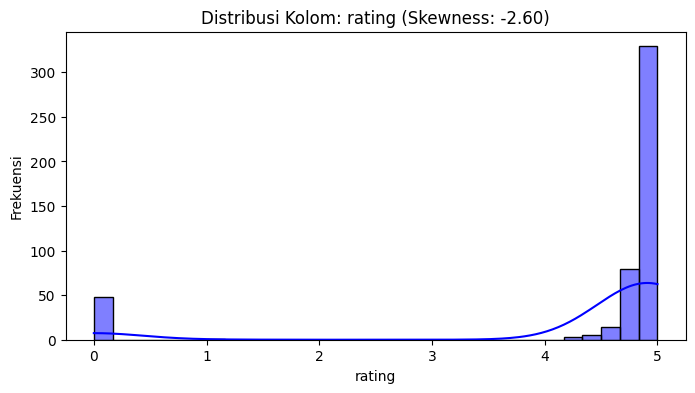

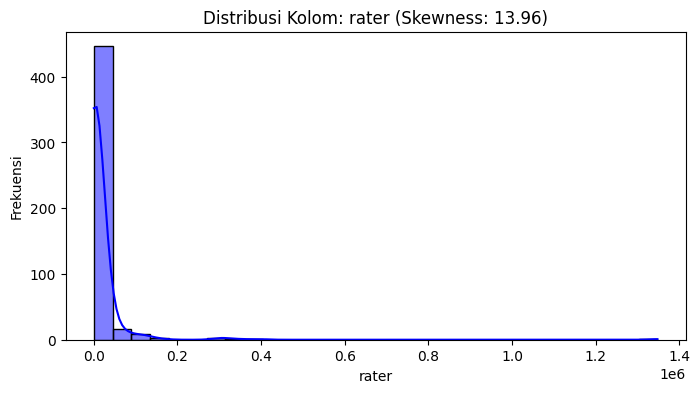

In [ ]:
# Visualisasi skewness menggunakan histogram
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi Kolom: {column} (Skewness: {skewness_values[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

<ipython-input-18-8804134ff8ec>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['Created Date'].dt.to_period('M')


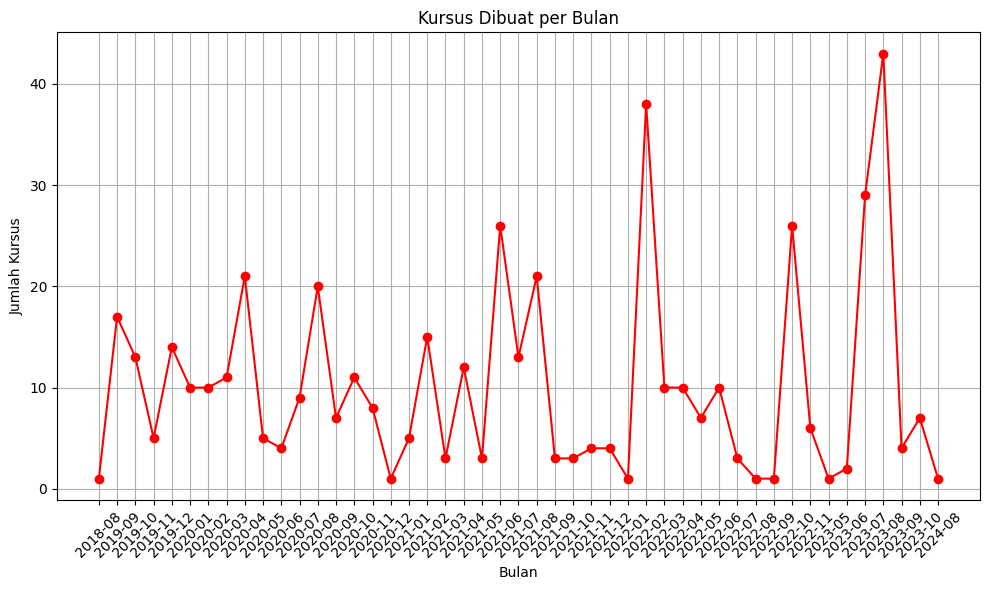

In [ ]:
df['Created Date'] = pd.to_datetime(df['createdDate'])

df['Year-Month'] = df['Created Date'].dt.to_period('M')

courses_per_month = df.groupby('Year-Month').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
plt.plot(courses_per_month['Year-Month'].astype(str), courses_per_month['Count'], marker='o', linestyle='-', color='red')
plt.title('Kursus Dibuat per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kursus')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

fig = px.histogram(df, x='price', nbins=10, title='Distribusi Harga Kursus',
                   labels={'price': 'Harga kursus'}, color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_title='Harga', yaxis_title='Jumlah')
fig.show()

In [ ]:
top_10 = df.nlargest(10, 'rater')
lowest_10 = df.nsmallest(10, 'rater')

extreme_courses = pd.concat([top_10, lowest_10])
extreme_courses['Category'] = ['Top 10'] * len(top_10) + ['Lowest 10'] * len(lowest_10)

fig = px.bar(extreme_courses, x='name', y='rater', color='Category',
             title='Top 10 and Lowest 10 Courses by Number of Raters')
fig.update_layout(xaxis_tickangle=45)
fig.show()


<ipython-input-21-3a58310bd62a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




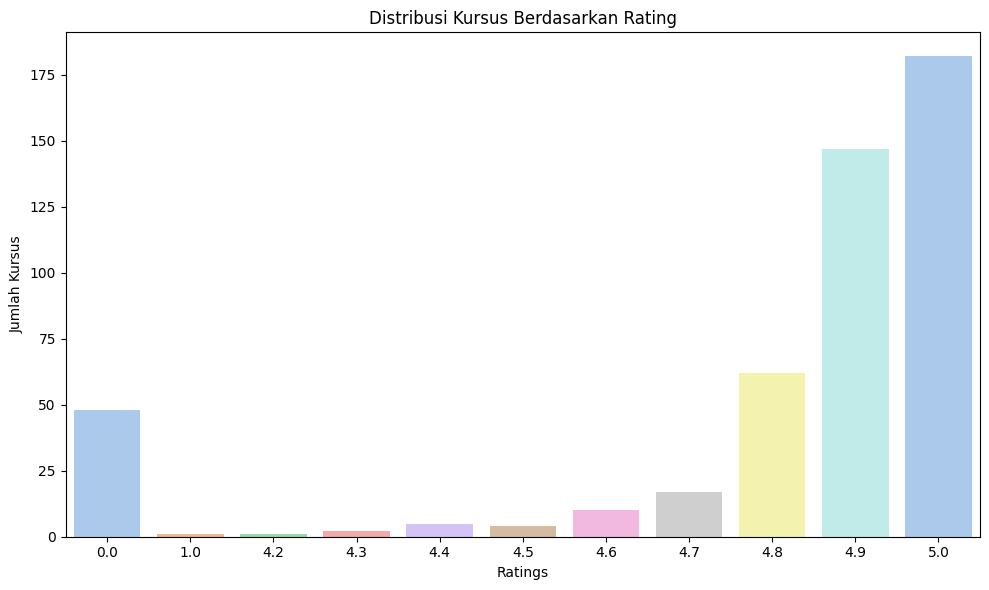

In [ ]:
rating_distribution = df.groupby('rating').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=rating_distribution, x='rating', y='Count', palette='pastel')
plt.xlabel('Ratings')
plt.ylabel('Jumlah Kursus')
plt.title('Distribusi Kursus Berdasarkan Rating')
plt.tight_layout()
plt.show()

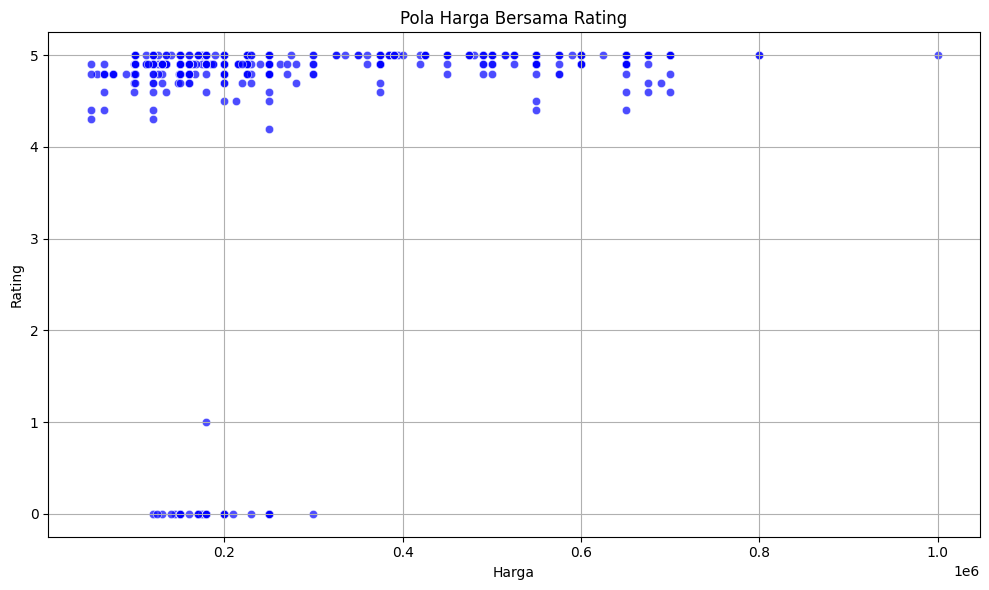

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rating', color='blue', alpha=0.7)
plt.title('Pola Harga Bersama Rating')
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

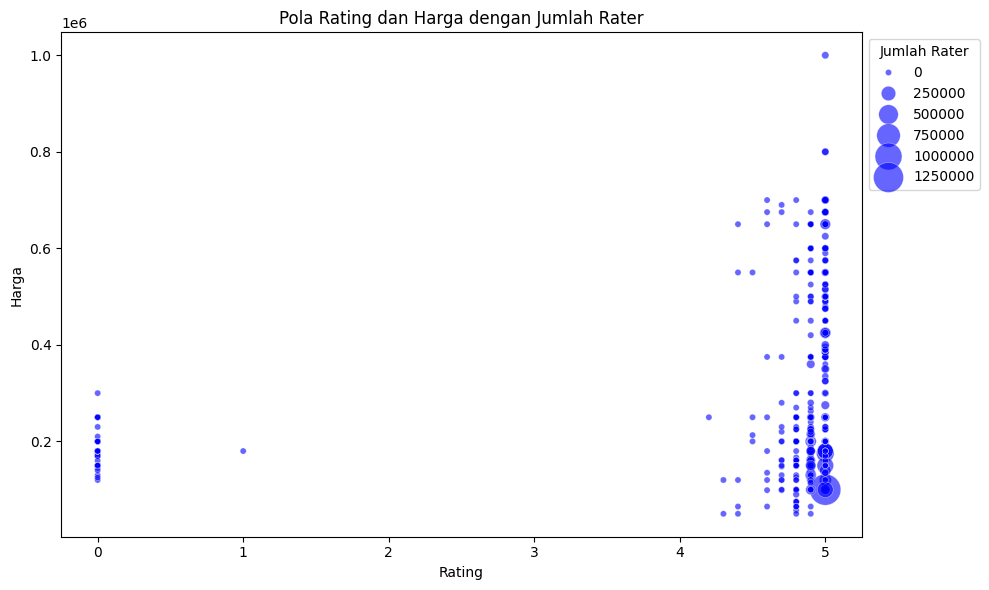

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rater'] = pd.to_numeric(df['rater'], errors='coerce')

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='rating',
    y='price',
    size='rater',
    sizes=(20, 500),
    alpha=0.6,
    color='blue'
)

plt.title('Pola Rating dan Harga dengan Jumlah Rater')
plt.xlabel('Rating')
plt.ylabel('Harga')
plt.legend(title='Jumlah Rater', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
import re

all_topics = " ".join(df['topics'])

all_topics_cleaned = re.sub(r'[^a-zA-Z\s]', '', all_topics.lower())

words = all_topics_cleaned.split()

stopwords = set(['in', 'for', 'and', 'the', 'of', 'to', 'a', 'on', 'with'])

filtered_words = [word for word in words if word not in stopwords]

word_counts = Counter(filtered_words)

common_words = word_counts.most_common(10)
print(common_words)


[('pilihan', 754), ('kelas', 492), ('pro', 479), ('course', 479), ('terbaik', 479), ('skill', 419), ('academy', 358), ('kerja', 152), ('siap', 146), ('terlaris', 135)]


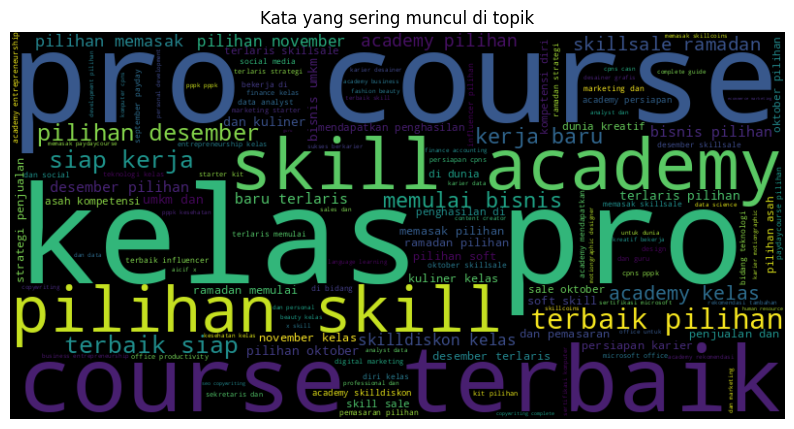

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata yang sering muncul di topik')
plt.show()


# Menjawab Research Question

## Question 1

In [ ]:
# Kursus dengan jumlah rater tertinggi
popular_courses = df[['name', 'rater']].sort_values(by='rater', ascending=False).head(10)
print(popular_courses)

                                                  name    rater
173            Membuat Masker Kain Homemade untuk UMKM  1347890
16            Sukses Menjadi Youtuber ala Gita Savitri   395760
189                   UMKM 101: Menentukan Badan Usaha   345989
237             Sukses Bisnis Online Shop di Instagram   308406
231        Mulai Bisnis Anti-Gagal dengan Lean Startup   306030
235              Mulai Karier sebagai Sales yang Andal   301144
12   Cara Asik Menghasilkan Uang dari HP dengan Wha...   163770
197                             Sukses Wawancara Kerja   135510
171              Raup Untung dengan Menjadi Freelancer   127168
429  Membuat Konten Pemasaran Media Sosial Mengguna...   123724


<ipython-input-27-420dff7c9abc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




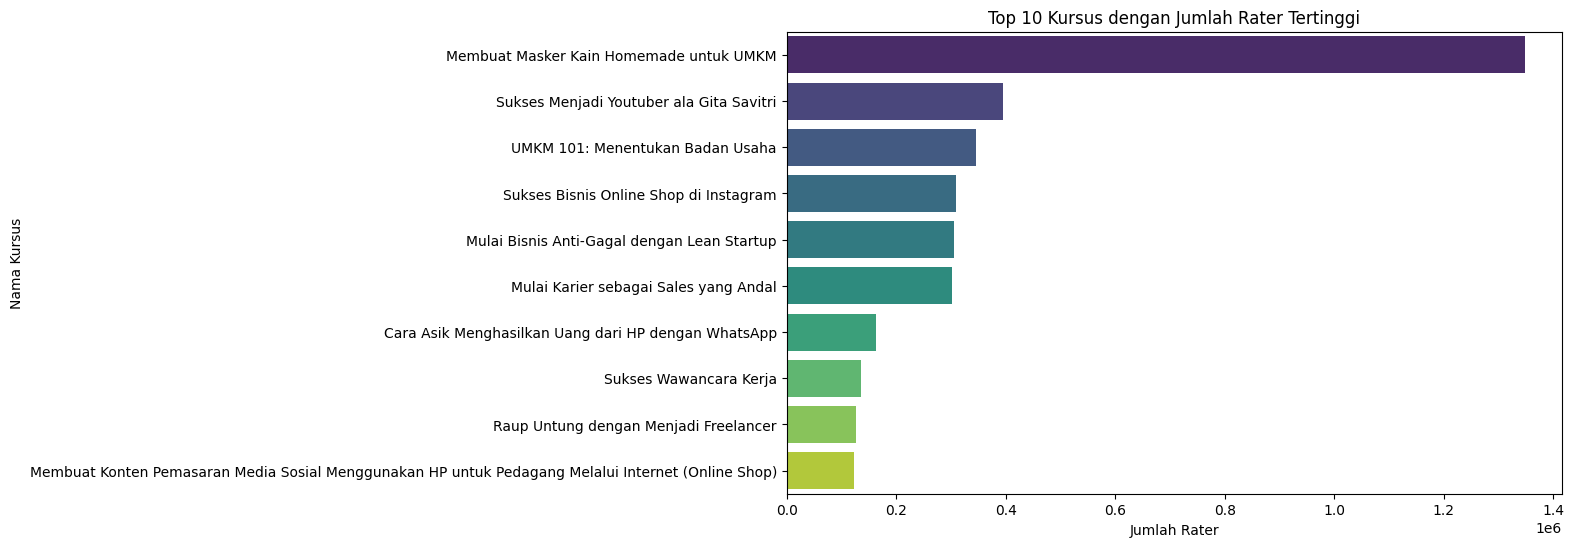

In [ ]:
# Bar plot untuk kursus dengan jumlah rater tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_courses, x='rater', y='name', palette='viridis')
plt.title('Top 10 Kursus dengan Jumlah Rater Tertinggi')
plt.xlabel('Jumlah Rater')
plt.ylabel('Nama Kursus')
plt.show()

## Question 2

In [ ]:
# Memastikan semua nilai dalam kolom 'topics' adalah string
df['topics'] = df['topics'].astype(str)

def safe_eval(value):
    try:
        return eval(value)
    except:
        return []

df['topics_list'] = df['topics'].apply(safe_eval)

# Melakukan eksplosif data dan menghitung rata-rata rating berdasarkan topik
topics_rating = (
    df.explode('topics_list')
    .groupby('topics_list')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(topics_rating)

topics_list
under700                                    5.000000
above700                                    5.000000
Mendapatkan Penghasilan di Dunia Kreatif    4.990323
Memulai Bisnis UMKM dan Kuliner             4.990244
Strategi Penjualan dan Pemasaran            4.987097
Bekerja di Bidang Teknologi                 4.982353
Sekretaris dan guru                         4.966667
September Payday                            4.960000
Siap Kerja                                  4.953425
Baru                                        4.953333
Name: rating, dtype: float64


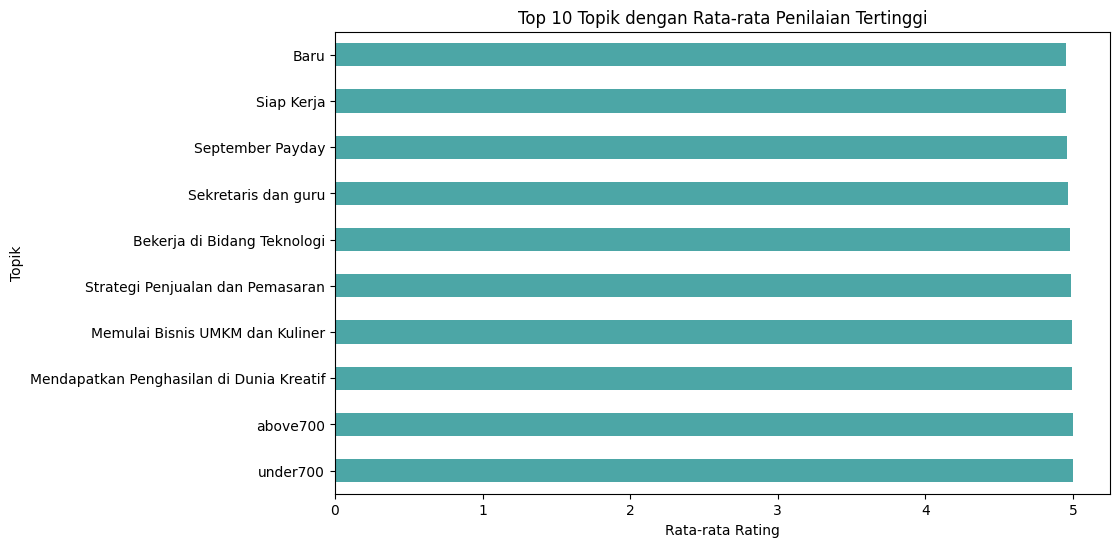

In [ ]:
# Bar plot untuk topik dengan rata-rata penilaian tertinggi
plt.figure(figsize=(10, 6))
topics_rating.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Top 10 Topik dengan Rata-rata Penilaian Tertinggi')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Topik')
plt.show()

## Question 3

In [ ]:
# Summary statistics for prices by topics
price_summary = (
    df.explode('topics_list')
    .groupby('topics_list')['price']
    .agg(['min', 'max', 'mean'])
    .sort_values(by='mean', ascending=False)
    .head(10)
)
print(price_summary)

                                             min      max           mean
topics_list                                                             
above700                                  700000  1000000  760000.000000
Bekerja di Bidang Teknologi               335000   700000  557647.058824
Siap Kerja                                225000  1000000  551712.328767
Human resource                            150000   700000  525000.000000
Memulai Bisnis UMKM dan Kuliner           275000   800000  517926.829268
Mendapatkan Penghasilan di Dunia Kreatif  225000  1000000  516451.612903
Baru                                      120000  1000000  508462.962963
Finance & accounting                      100000  1000000  485000.000000
Strategi Penjualan dan Pemasaran          225000   675000  479354.838710
Sekretaris dan guru                       120000   700000  461666.666667


<ipython-input-31-5936afd253da>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




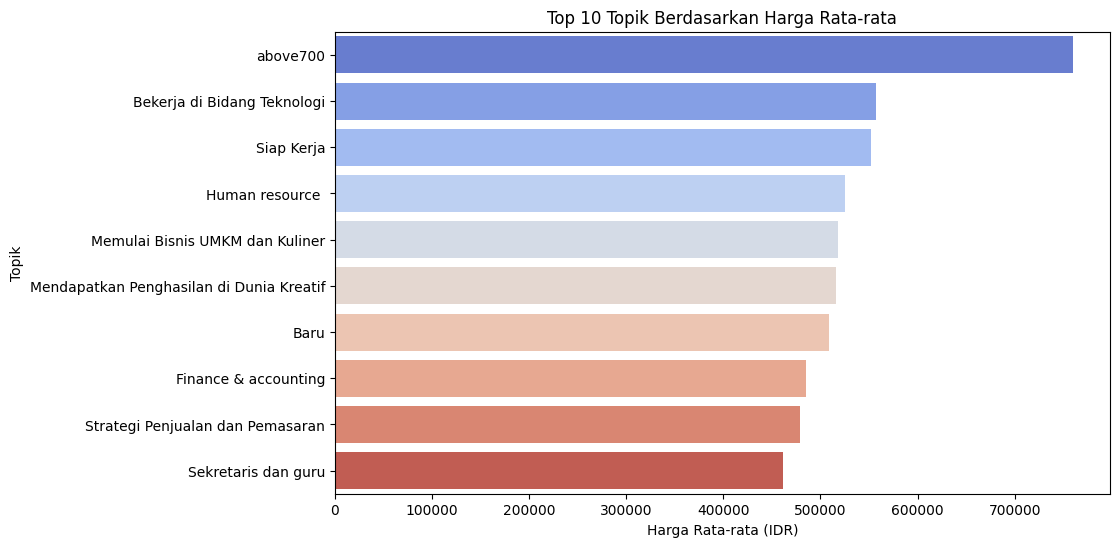

In [ ]:
# Boxplot untuk harga berdasarkan topik
price_summary_plot = price_summary.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=price_summary_plot, x='mean', y='topics_list', palette='coolwarm')
plt.title('Top 10 Topik Berdasarkan Harga Rata-rata')
plt.xlabel('Harga Rata-rata (IDR)')
plt.ylabel('Topik')
plt.show()

## Question 4

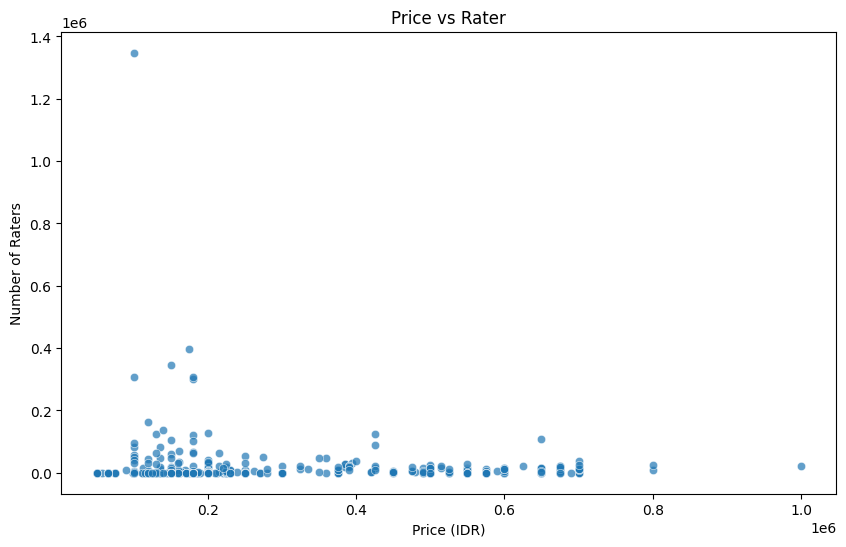

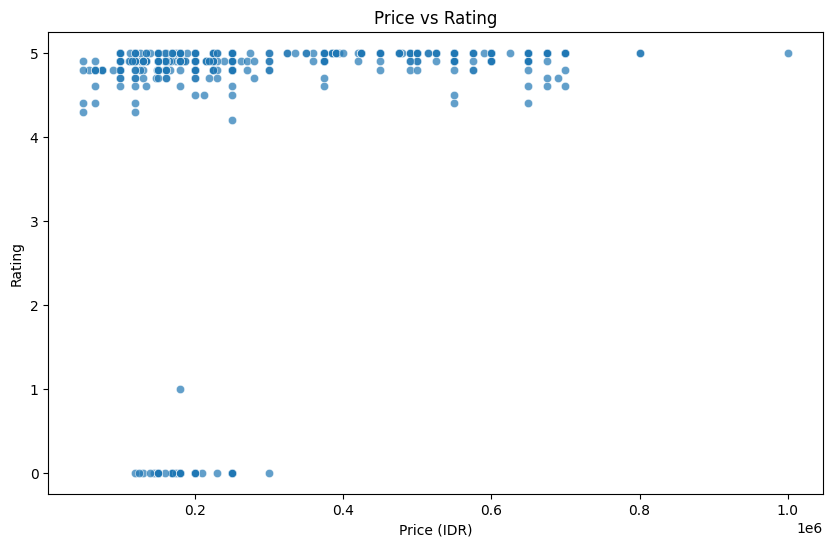

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between price and rater
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rater', alpha=0.7)
plt.title('Price vs Rater')
plt.xlabel('Price (IDR)')
plt.ylabel('Number of Raters')
plt.show()

# Scatter plot between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rating', alpha=0.7)
plt.title('Price vs Rating')
plt.xlabel('Price (IDR)')
plt.ylabel('Rating')
plt.show()

## Question 5

    year  month  count
0   2018      8      1
1   2019      9     17
2   2019     10     13
3   2019     11      5
4   2019     12     14
5   2020      1     10
6   2020      2     10
7   2020      3     11
8   2020      4     21
9   2020      5      5
10  2020      6      4
11  2020      7      9
12  2020      8     20
13  2020      9      7
14  2020     10     11
15  2020     11      8
16  2020     12      1
17  2021      1      5
18  2021      2     15
19  2021      3      3
20  2021      4     12
21  2021      5      3
22  2021      6     26
23  2021      7     13
24  2021      8     21
25  2021      9      3
26  2021     10      3
27  2021     11      4
28  2021     12      4
29  2022      1      1
30  2022      2     38
31  2022      3     10
32  2022      4     10
33  2022      5      7
34  2022      6     10
35  2022      7      3
36  2022      8      1
37  2022      9      1
38  2022     10     26
39  2022     11      6
40  2023      5      1
41  2023      6      2
42  2023   

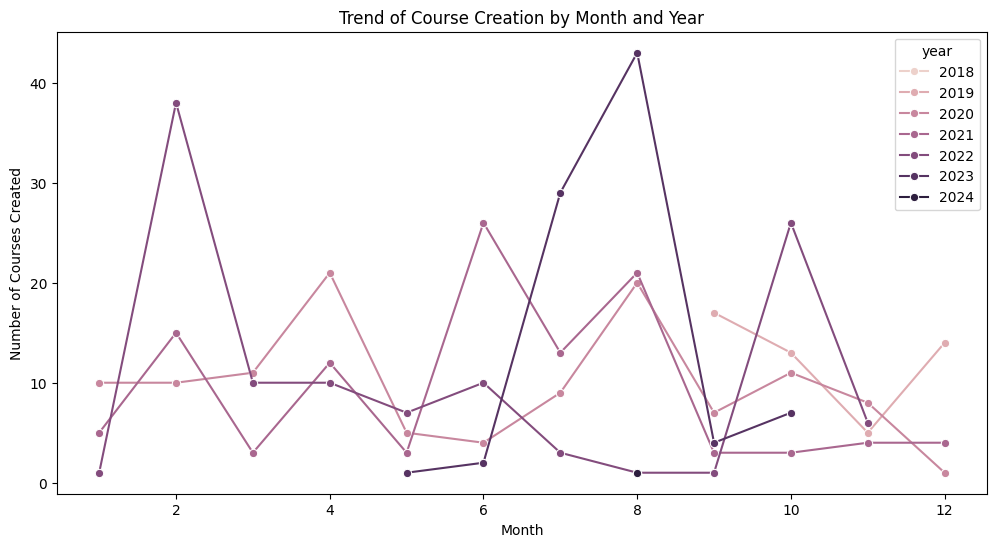

In [ ]:
# Extracting year and month from createdDate
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['year'] = df['createdDate'].dt.year
df['month'] = df['createdDate'].dt.month

# Group by year and month
trend_by_time = df.groupby(['year', 'month']).size().reset_index(name='count')
print(trend_by_time)

# Line plot for course creation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_by_time, x='month', y='count', hue='year', marker='o')
plt.title('Trend of Course Creation by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Courses Created')
plt.show()

## Question 6

In [ ]:
# Average rating and rater by year
popularity_by_year = df.groupby('year')[['rating', 'rater']].mean()
print(popularity_by_year)

        rating          rater
year                         
2018  5.000000  395760.000000
2019  4.873469   35056.367347
2020  4.883761   30648.376068
2021  4.920536   11759.580357
2022  4.906195    3254.557522
2023  2.118605      17.593023
2024  4.700000       3.000000


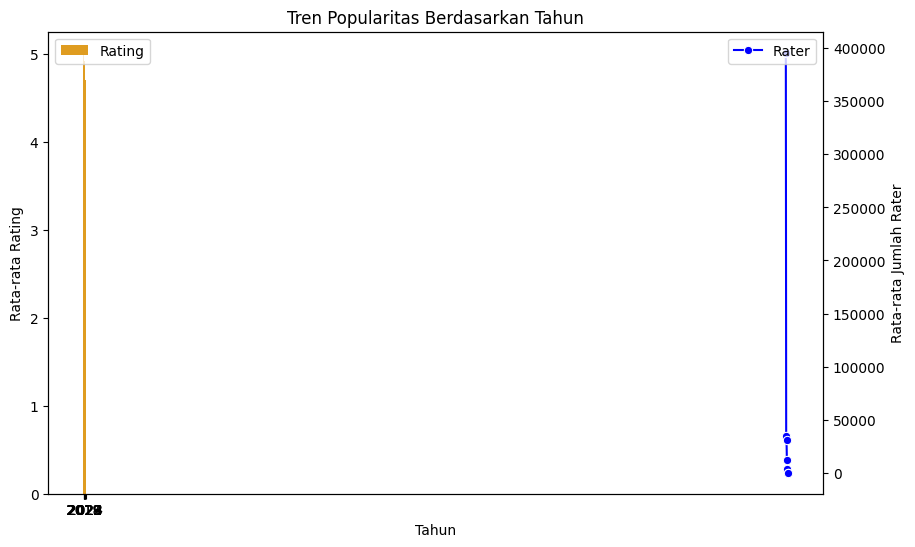

In [ ]:
# Bar plot untuk rata-rata rating dan rater berdasarkan tahun
popularity_by_year_plot = popularity_by_year.reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=popularity_by_year_plot, x='year', y='rating', color='orange', label='Rating', ax=ax1)
ax1.set_ylabel('Rata-rata Rating')
ax1.set_xlabel('Tahun')
ax1.legend(loc='upper left')

# Adding a secondary y-axis for Rater
ax2 = ax1.twinx()
sns.lineplot(data=popularity_by_year_plot, x='year', y='rater', color='blue', marker='o', label='Rater', ax=ax2)
ax2.set_ylabel('Rata-rata Jumlah Rater')
plt.title('Tren Popularitas Berdasarkan Tahun')
plt.legend(loc='upper right')
plt.show()

## Question 7

In [ ]:
# Counting topic frequencies in popular courses
top_topics = (
    df.explode('topics_list')
    .groupby('topics_list')['rater']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_topics)

topics_list
Kelas Pro Course Terbaik    7385736
Pilihan Skill Academy       6555967
Pilihan Memasak             3162255
Terlaris                    3061486
Pilihan Desember            2460792
Entrepreneurship            1880651
Skillsale Ramadan           1654052
Siap Kerja                  1599672
Baru                        1591986
Pilihan November            1535707
Name: rater, dtype: int64


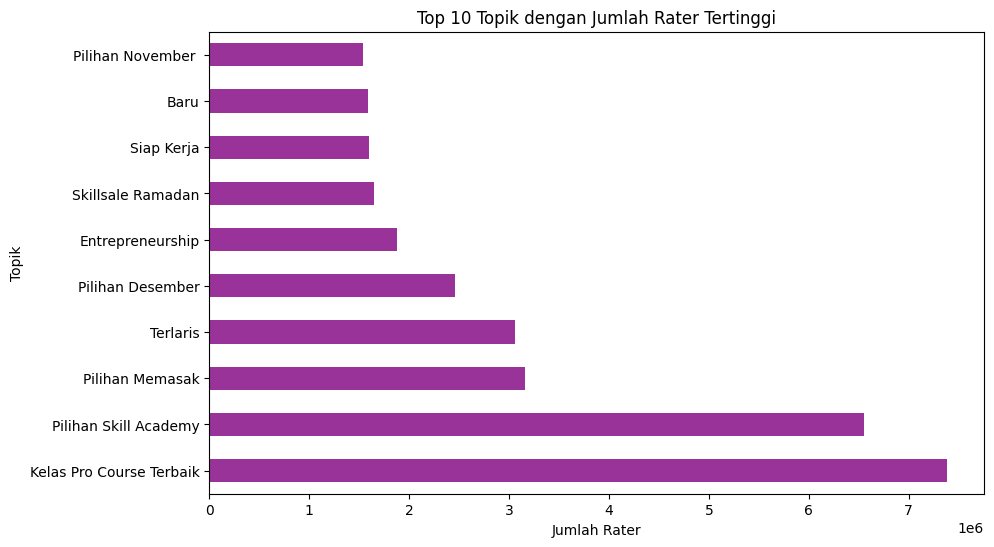

In [ ]:
# Bar plot untuk topik populer
plt.figure(figsize=(10, 6))
top_topics.plot(kind='barh', color='purple', alpha=0.8)
plt.title('Top 10 Topik dengan Jumlah Rater Tertinggi')
plt.xlabel('Jumlah Rater')
plt.ylabel('Topik')
plt.show()

## Question 8

<ipython-input-38-3941e02ba91f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




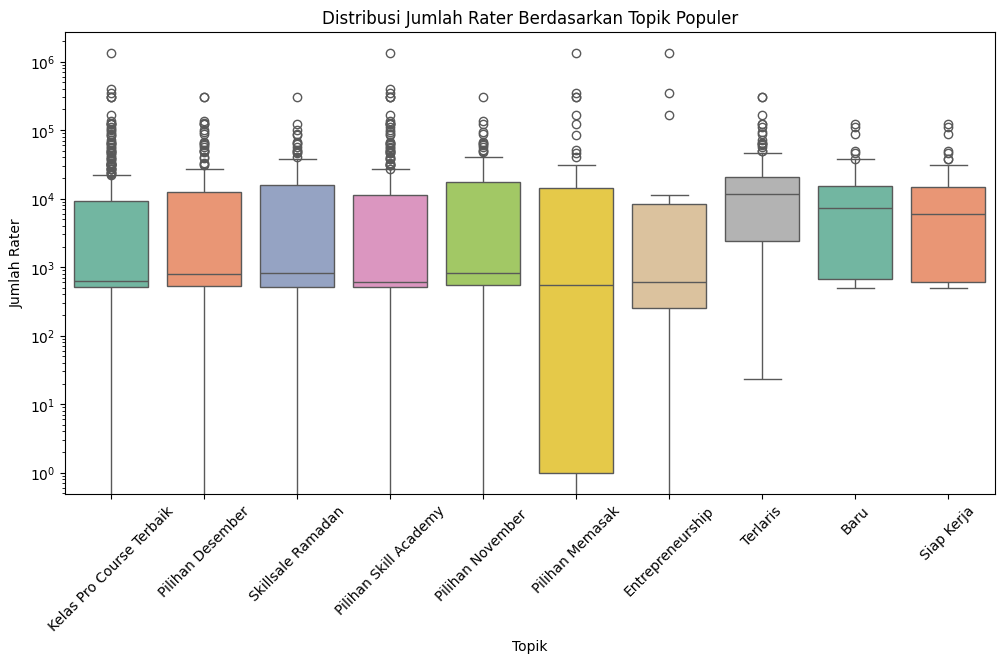

In [ ]:
# Boxplot untuk distribusi jumlah rater berdasarkan topik populer
top_topics_list = top_topics.index.tolist()
topic_popularity = df.explode('topics_list')

# Filter hanya untuk topik populer
topic_popularity_filtered = topic_popularity[topic_popularity['topics_list'].isin(top_topics_list)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=topic_popularity_filtered, x='topics_list', y='rater', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribusi Jumlah Rater Berdasarkan Topik Populer')
plt.xlabel('Topik')
plt.ylabel('Jumlah Rater')
plt.yscale('log')
plt.show()

In [ ]:
top_topics_list

['Kelas Pro Course Terbaik',
 'Pilihan Skill Academy',
 'Pilihan Memasak',
 'Terlaris',
 'Pilihan Desember',
 'Entrepreneurship',
 'Skillsale Ramadan',
 'Siap Kerja',
 'Baru',
 'Pilihan November ']

In [ ]:
topic_popularity_filtered.head(5)

,name,description,createdDate,marketType,price,rating,rater,topics,Created Date,Year-Month,topics_list,year,month
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03 07:45:38+00:00,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia...",2020-02-03 07:45:38+00:00,2020-02,Kelas Pro Course Terbaik,2020,2
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03 07:45:38+00:00,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia...",2020-02-03 07:45:38+00:00,2020-02,Pilihan Desember,2020,2
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03 07:45:38+00:00,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia...",2020-02-03 07:45:38+00:00,2020-02,Skillsale Ramadan,2020,2
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03 07:45:38+00:00,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia...",2020-02-03 07:45:38+00:00,2020-02,Pilihan Skill Academy,2020,2
0,Storytelling dan Creative Writing untuk Menuli...,<div>Kelas ini membahas tentang teknik menulis...,2020-02-03 07:45:38+00:00,ONLINE,360000,4.9,47973,"['E-Commerce Marketing Complete Guide', 'Socia...",2020-02-03 07:45:38+00:00,2020-02,Pilihan November,2020,2


# Kesimpulan untuk research question
## Analisis kursus yang paling populer
1. Kursus "Membuat Masker Kain Homemade untuk UMKM" menjadi yang paling populer dengan jumlah rater sebanyak 1.3 juta. Kursus lain seperti "Sukses Menjadi Youtuber ala Gita Savitri" dan "UMKM 101: Menentukan Badan Usaha" juga diminati dengan jumlah rater lebih dari 300 ribu.
2. Topik "Mendapatkan Penghasilan di Dunia Kreatif" memiliki rata-rata penilaian tertinggi 4.99, diikuti oleh "Memulai Bisnis UMKM dan Kuliner" (4.99) dan "Strategi Penjualan dan Pemasaran" (4.98).

## Analisis harga berdasarkan ketogori topik pembelajaran
1. Topik "above700" memiliki harga tertinggi dengan rata-rata 760 ribu IDR, sementara topik seperti "Sekretaris dan guru" memiliki rata-rata harga lebih rendah sekitar 461 ribu IDR.
2. Tidak ada pola langsung yang jelas antara harga kursus dengan jumlah rater atau rating. Beberapa kursus dengan harga tinggi tetap memiliki banyak rater, menunjukkan bahwa popularitas lebih dipengaruhi oleh konten daripada harga.

## Analisis waktu paling ramai
1. Topik "Kelas Pro Course Terbaik" memiliki jumlah rater tertinggi (7.3 juta), diikuti oleh "Pilihan Skill Academy" (6.5 juta) dan "Terlaris" (3.06 juta).
2. Kursus dengan topik seperti "Kelas Pro Course Terbaik" memiliki daya tarik besar, dengan beberapa kursus mendapatkan jumlah rater yang sangat tinggi (lebih dari 1 juta). Topik seperti "Skillsale Ramadan" juga menarik untuk beberapa kursus tertentu, meskipun sebagian besar kursus memiliki jumlah rater yang lebih rendah. Sebaliknya, topik seperti "Siap Kerja" cenderung memiliki distribusi jumlah rater yang lebih konsisten tanpa kursus yang sangat menonjol.